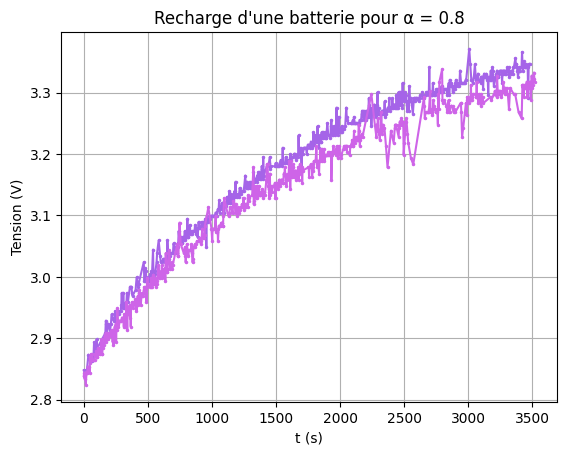

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def lecture(fichier):
    a = []
    b = []
    c = []
    with open(fichier,'r') as f:
        for ligne in f:
            ai,bi,ci = [float(val.strip()) for val in ligne.split(';')]
            a.append(ai)
            b.append(bi)
            c.append(ci)
    return a, b, c

def lecture2(fichier):
    a = []
    b = []
    c = []
    with open(fichier,'r') as f:
        for ligne in f:
            ai,bi,ci = [float(val.strip()) for val in ligne.split('\t')]
            a.append(ai)
            b.append(bi)
            c.append(ci)
    return a, b, c

def ajustement(fichier):
    t, exp, moy = lecture(fichier)
    N = []
    T = []
    for i in range (len(t)):
        if np.abs(exp[i]-moy[i]) < 0.03:
            N.append(exp[i])
            T.append(t[i])
    return T, N

def ajustement2(fichier):
    t, exp, moy = lecture2(fichier)
    N = []
    T = []
    for i in range (len(t)):
        if np.abs(exp[i]-moy[i]) < 0.03:
            N.append(exp[i])
            T.append(t[i])
    return T, N

T081,A081 = ajustement("TIPE7mesure08(1).csv")
T082,A082 = ajustement2("TIPE7mesure08(2).csv")

def coupe(T,A):
    seuil = 2.8
    N = []
    T2 = []
    T3 = []
    for i in range (len(A)):
        if A[i]>seuil:
            N.append(A[i])
            T2.append(T[i] - T[0])
    for j in range (len(T2)):
        T3.append(T2[j] - T2[0])
    return T3, N

t081, exp081 = coupe(T081, A081)
t082, exp082 = coupe(T082, A082)

plt.plot(t081, exp081, color ="#a564e8", label = "α = 0.8", marker = '.', markersize = 3)
plt.plot(t082, exp082, color ="#ce64e8", label = "α = 0.8", marker = '.', markersize = 3)

plt.xlabel("t (s)")
plt.ylabel("Tension (V)")
plt.title("Recharge d'une batterie pour α = 0.8")
plt.grid()
plt.show()